21
LogisticRegression score: 1.000000


/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


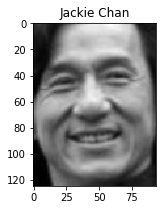

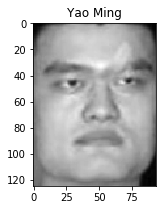

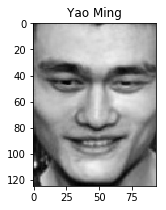

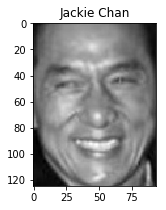

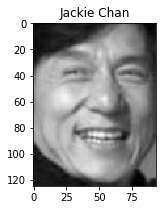

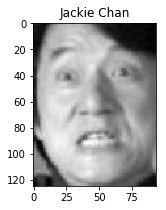

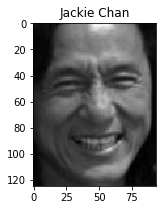

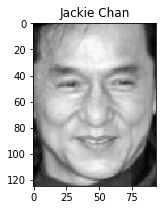

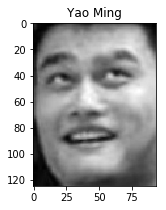

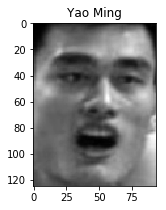

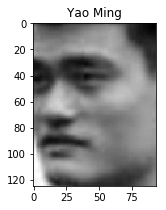

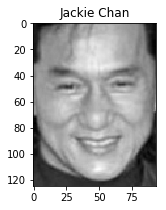

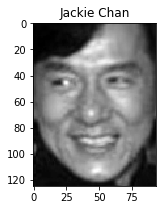

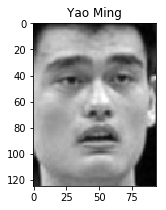

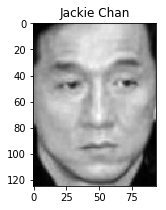

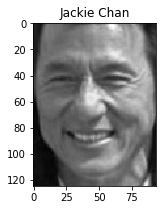

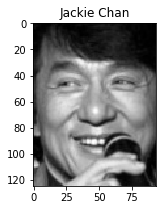

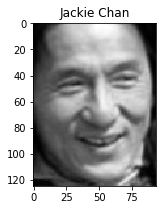

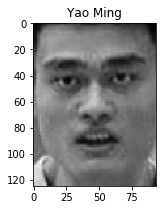

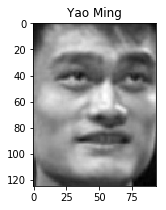

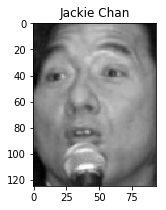

In [3]:
import load_faces
from sklearn import datasets, neighbors, linear_model
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

faces = load_faces.fetch_faces('/notebook/faces')
X = faces.data
y = faces.target

n_samples = len(X)

print n_samples

X_train = X[:int(.9 * n_samples)]
y_train = y[:int(.9 * n_samples)]
X_test = X[int(.9 * n_samples):]
y_test = y[int(.9 * n_samples):]

logistic = linear_model.LogisticRegression()

print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

for (index, im) in enumerate(faces.images):
    fig = plt.figure(figsize=(7,3))
    plt.imshow(im, cmap=plt.cm.gray)
    plt.title(faces.target_names[faces.target[index]])
    plt.grid(False)
